<a href="https://colab.research.google.com/github/OviedoVR/PredicaoDiabetes/blob/main/Diabetes_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **É possível prever *diabetes* com uma boa precisão?**

Neste *notebook Python*, vamos responder a esta pergunta utilizado a metodologia **CRISP-DM**.

Etapas do projeto:


1.   **Entendimento do negócio**
2.   **Entendimento dos dados**
3.   **Preparação dos dados**
4.   **Modelagem dos dados**
5.   **Aplicação do modelo**
6.   **Deploy**

# **1. Entendimento do negócio**

**Objetivo:** obter um modelo para prever se um paciente tem diabetes ou não, com acurácia maior ou igual a 70%.

# **2. Entendimento dos dados**

**Dados:** planilha com pacientes contendo nível de LDL, glicose, HDL, idade, gênero, altura, massa, IMC, pressão sanguínea sistólica e diastólica, medida da cintura e medida do quadril.

Aqui será realizada a **Análise Exploratória dos Dados** (EDA).

---

> **Configurações**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#estilizando os gráficos
# from IPython import display
# display.set_matplotlib_formats('svg')
from pylab import *
rc('axes', linewidth=1.5)

plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1.5

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [3]:
# Configs. adicionais
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'png'

> **Coletando os dados**

In [4]:
dados = pd.read_csv('diabetes.csv')
dados.head(3)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes


> **Renomeando as colunas**

In [5]:
dados.columns

Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes'],
      dtype='object')

In [6]:
dados.rename(columns=
        {'patient_number': 'n_paciente', 
        'cholesterol': 'ldl',
        'glucose': 'glicose', 
        'hdl_chol': 'hdl',
        'chol_hdl_ratio': 'razao_ldl_hdl',
         'age': 'idade', 
         'gender': 'genero', 
         'height': 'altura', 
         'weight': 'massa',
         'bmi': 'imc',
         'systolic_bp': 'ps_sistole', 
         'diastolic_bp': 'ps_diastole', 
         'waist': 'medida_cintura', 
         'hip': 'medida_quadril', 
         'waist_hip_ratio': 'razao_cint_quad'
        }, inplace = True
)

dados.tail(2)

,n_paciente,ldl,glicose,hdl,razao_ldl_hdl,idade,genero,altura,massa,imc,ps_sistole,ps_diastole,medida_cintura,medida_quadril,razao_cint_quad,diabetes
388,389,232,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes
389,390,165,94,69,"2,4",92,female,62,217,"39,7",160,82,51,51,1,No diabetes


> **Checando as informações do conjunto de dados**

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   n_paciente       390 non-null    int64 
 1   ldl              390 non-null    int64 
 2   glicose          390 non-null    int64 
 3   hdl              390 non-null    int64 
 4   razao_ldl_hdl    390 non-null    object
 5   idade            390 non-null    int64 
 6   genero           390 non-null    object
 7   altura           390 non-null    int64 
 8   massa            390 non-null    int64 
 9   imc              390 non-null    object
 10  ps_sistole       390 non-null    int64 
 11  ps_diastole      390 non-null    int64 
 12  medida_cintura   390 non-null    int64 
 13  medida_quadril   390 non-null    int64 
 14  razao_cint_quad  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


Podemos ver que o conjunto de dados tem **390 linhas** (cada uma representa um paciente) e **16 colunas** (cada uma representa um variável).

A coluna ***diabetes*** informa se o paciente tem ou não diabetes. Podemos notar que a coluna *imc* está como texto, então precisamos convertê-la para número decimal (*float*). Isso também se aplica as colunas **razao_ldl_hdl** e **razao_cint_quad**.

In [8]:
dados['imc'] = dados[['imc']].applymap(lambda valor: str(valor).replace(',', '.'))
dados['imc'] = dados['imc'].astype('float64')

dados['razao_ldl_hdl'] = dados[['razao_ldl_hdl']].applymap(lambda valor: str(valor).replace(',', '.'))
dados['razao_ldl_hdl'] = dados['razao_ldl_hdl'].astype('float64')


dados['razao_cint_quad'] = dados[['razao_cint_quad']].applymap(lambda valor: str(valor).replace(',', '.'))
dados['razao_cint_quad'] = dados['razao_cint_quad'].astype('float64')

Ainda, podemos notar que não exsitem valores nulos, o que pode ser confirmado no código abaixo:

In [9]:
# calcula a porcentagem de dados nulos em cada coluna:
dados.isnull().sum()/len(dados)  * 100 

n_paciente         0.0
ldl                0.0
glicose            0.0
hdl                0.0
razao_ldl_hdl      0.0
idade              0.0
genero             0.0
altura             0.0
massa              0.0
imc                0.0
ps_sistole         0.0
ps_diastole        0.0
medida_cintura     0.0
medida_quadril     0.0
razao_cint_quad    0.0
diabetes           0.0
dtype: float64

> **Checando a distribuição dos dados**

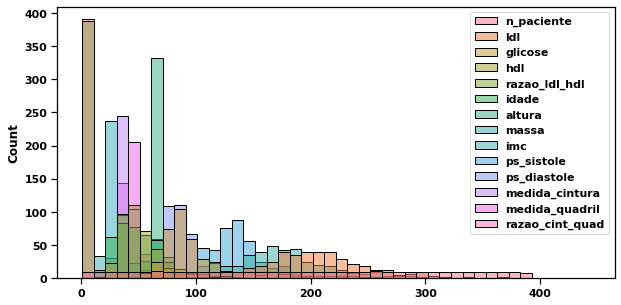

In [10]:
plt.figure(figsize=(10,5));
sns.histplot(dados, edgecolor='k');

> **Verificando *outliers***

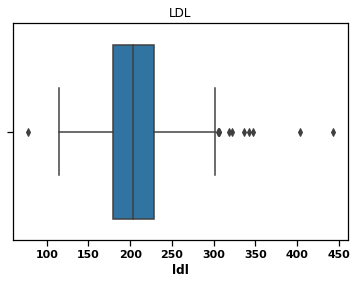

In [11]:
plt.title('LDL');
sns.boxplot('ldl', data = dados);

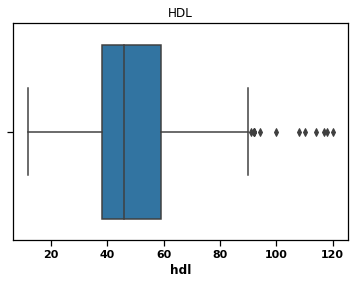

In [12]:
plt.title('HDL');
sns.boxplot('hdl', data = dados);

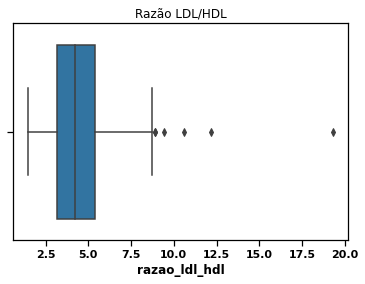

In [13]:
plt.title('Razão LDL/HDL');
sns.boxplot('razao_ldl_hdl', data = dados);

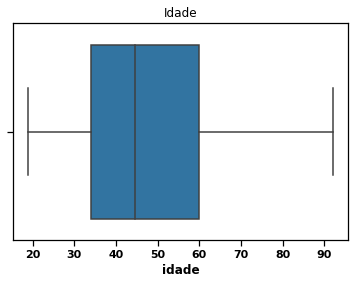

In [14]:
plt.title('Idade');
sns.boxplot('idade', data = dados);

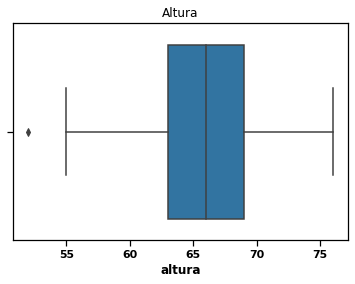

In [15]:
plt.title('Altura');
sns.boxplot('altura', data = dados);

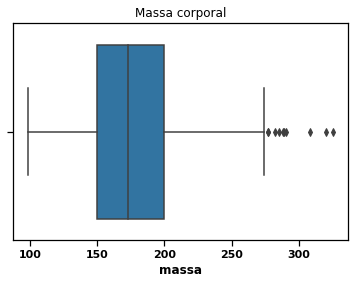

In [16]:
plt.title('Massa corporal');
sns.boxplot('massa', data = dados);

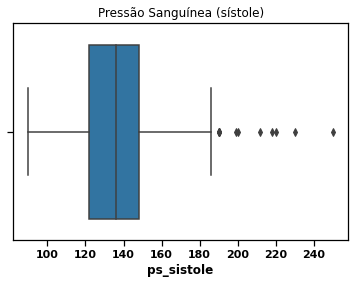

In [17]:
plt.title('Pressão Sanguínea (sístole)');
sns.boxplot('ps_sistole', data = dados);

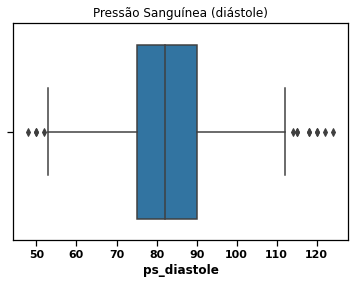

In [18]:
plt.title('Pressão Sanguínea (diástole)');
sns.boxplot('ps_diastole', data = dados);

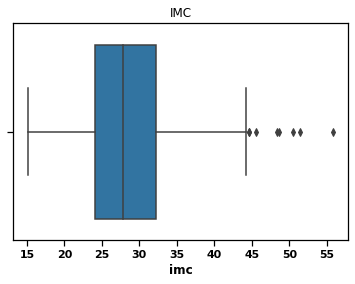

In [19]:
plt.title('IMC');
sns.boxplot('imc', data = dados);

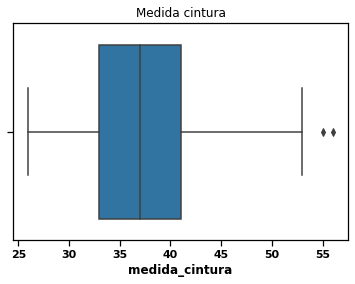

In [20]:
plt.title('Medida cintura');
sns.boxplot('medida_cintura', data = dados);

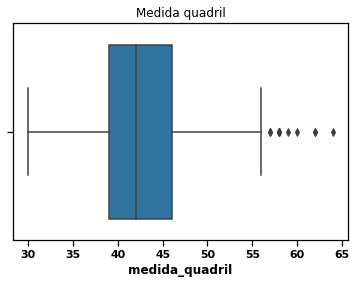

In [21]:
plt.title('Medida quadril');
sns.boxplot('medida_quadril', data = dados);

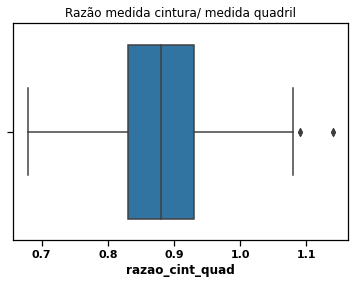

In [22]:
plt.title('Razão medida cintura/ medida quadril');
sns.boxplot('razao_cint_quad', data = dados);

Conforme vemos nos gráficos de **boxplot**, existem *outliers* nas colunas:

*   `ldl`, `hdl` e `razao_ldl_hdl`
*    `ps_sistole`, `ps_diastole`
*   `massa`, `altura` e `imc`
*   `medida_cintura`, `medida_quadril` e `razao_cint_quad`

Ou seja, apenas a coluna **idade** não possui *outliers*.


> **Obtendo as estatísticas descritivas**

In [23]:
round(dados.describe(), 2)

,n_paciente,ldl,glicose,hdl,razao_ldl_hdl,idade,altura,massa,imc,ps_sistole,ps_diastole,medida_cintura,medida_quadril,razao_cint_quad
count,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00,390.00
mean,195.50,207.23,107.34,50.27,4.52,46.77,65.95,177.41,28.78,137.13,83.29,37.87,42.99,0.88
std,112.73,44.67,53.80,17.28,1.74,16.44,3.92,40.41,6.60,22.86,13.50,5.76,5.66,0.07
min,1.00,78.00,48.00,12.00,1.50,19.00,52.00,99.00,15.20,90.00,48.00,26.00,30.00,0.68
25%,98.25,179.00,81.00,38.00,3.20,34.00,63.00,150.25,24.10,122.00,75.00,33.00,39.00,0.83
50%,195.50,203.00,90.00,46.00,4.20,44.50,66.00,173.00,27.80,136.00,82.00,37.00,42.00,0.88
75%,292.75,229.00,107.75,59.00,5.40,60.00,69.00,200.00,32.28,148.00,90.00,41.00,46.00,0.93
max,390.00,443.00,385.00,120.00,19.30,92.00,76.00,325.00,55.80,250.00,124.00,56.00,64.00,1.14


> **Checando proporções de diabéticos e não diabétricos**

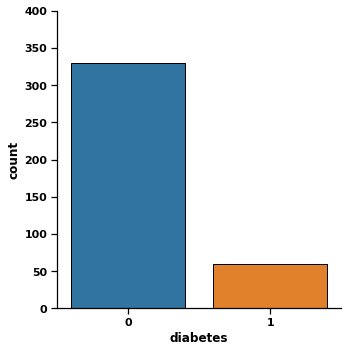

In [24]:
# Tratamento de variáveis categóricas (não-numéricas:
dados.replace('No diabetes', 0, inplace=True)
dados.replace('Diabetes', 1, inplace=True)

dados.replace('female', 0, inplace=True)
dados.replace('male', 1, inplace=True)

# Visualização:
sns.catplot(kind='count', x='diabetes', edgecolor='k', data = dados);
plt.ylim([0,400]);

Conforme podemos ver no **gráfico de barras** acima, os dados estão **desbalanceados**, o que pode comprometer a etapa de **modelagem**, pois temos muito mais pacientes sem diabates do que pacientes com diabetes.

In [25]:
print(dados.query('diabetes == 0')['diabetes'].value_counts() / len(dados) * 100)
print(dados.query('diabetes == 1')['diabetes'].value_counts() / len(dados) *100)

0    84.615385
Name: diabetes, dtype: float64
1    15.384615
Name: diabetes, dtype: float64


# **3. Preparação dos dados**

**Ações:**

*   Tratamento de valores nulos/faltantes;
*   Tratamento de com *outliers* (valores discrepantes);
*   Tratamento de variáveis categóricas (não-numéricas);
*   Separação dados de treino e de teste.





> **Tratamento de valores nulos/faltantes**

In [26]:
# nova checagem por valores nulos:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   n_paciente       390 non-null    int64  
 1   ldl              390 non-null    int64  
 2   glicose          390 non-null    int64  
 3   hdl              390 non-null    int64  
 4   razao_ldl_hdl    390 non-null    float64
 5   idade            390 non-null    int64  
 6   genero           390 non-null    int64  
 7   altura           390 non-null    int64  
 8   massa            390 non-null    int64  
 9   imc              390 non-null    float64
 10  ps_sistole       390 non-null    int64  
 11  ps_diastole      390 non-null    int64  
 12  medida_cintura   390 non-null    int64  
 13  medida_quadril   390 non-null    int64  
 14  razao_cint_quad  390 non-null    float64
 15  diabetes         390 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 48.9 KB


Como não temos **valores nulos** no conjunto de dados, não precisamos de tratamento neste caso.

> **Tratamento de *outliers***

In [27]:
# importando as configurações/bibliotecas necessárias:
from sklearn.ensemble import IsolationForest

Vamos utilizar o moelo ***Isolation Forest*** para detectar os *outliers** e removê-los do conjunto de dados, cajo não representem um número significativo dos dados originais. 

In [28]:
estimadores = int(np.sqrt(dados.shape[0]))
detecta_outliers = IsolationForest(contamination=0.1, n_estimators = estimadores)

outliers = detecta_outliers.fit(dados)
dados['outliers'] = outliers.predict(dados)
dados.head(2)

,n_paciente,ldl,glicose,hdl,razao_ldl_hdl,idade,genero,altura,massa,imc,ps_sistole,ps_diastole,medida_cintura,medida_quadril,razao_cint_quad,diabetes,outliers
0,1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0,1
1,2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0,-1


Neste caso temos na coluna **outliers**:

*   **É um outlier**: -1
*   **Não é um outlier**: 1


In [29]:
dados_tratados = dados.query('outliers == 1')
dados_tratados.shape

(351, 17)

> **Verificando o impacto dos outliers no tamanho dos dados**

In [30]:
reduao_de_linhas = int( (1 - dados_tratados.shape[0] / dados.shape[0]) * 100)
print(f'O conjunto de dados teve um redução de {reduao_de_linhas}% nas linhas após a remoção dos ouliers.')

O conjunto de dados teve um redução de 9% nas linhas após a remoção dos ouliers.


> **Separação dados de treino e de teste**

In [31]:
# importando as configurações/bibliotecas necessárias:
from sklearn.model_selection import train_test_split

Primeiro, vamos checar as colunas e excluir a coluna **outliers**, pois já lidamos com eles. Podemos excluir a coluna **n_paciente**, pois ela não será utilizada.

In [32]:
dados_tratados.columns

Index(['n_paciente', 'ldl', 'glicose', 'hdl', 'razao_ldl_hdl', 'idade',
       'genero', 'altura', 'massa', 'imc', 'ps_sistole', 'ps_diastole',
       'medida_cintura', 'medida_quadril', 'razao_cint_quad', 'diabetes',
       'outliers'],
      dtype='object')

In [33]:
dados_tratados.drop(columns = ['n_paciente','outliers'], inplace = True)

In [34]:
dados_tratados.columns

Index(['ldl', 'glicose', 'hdl', 'razao_ldl_hdl', 'idade', 'genero', 'altura',
       'massa', 'imc', 'ps_sistole', 'ps_diastole', 'medida_cintura',
       'medida_quadril', 'razao_cint_quad', 'diabetes'],
      dtype='object')

Adicionalmente, vamos verificar correlações nas colunas, de modo a reduzir as variáveis

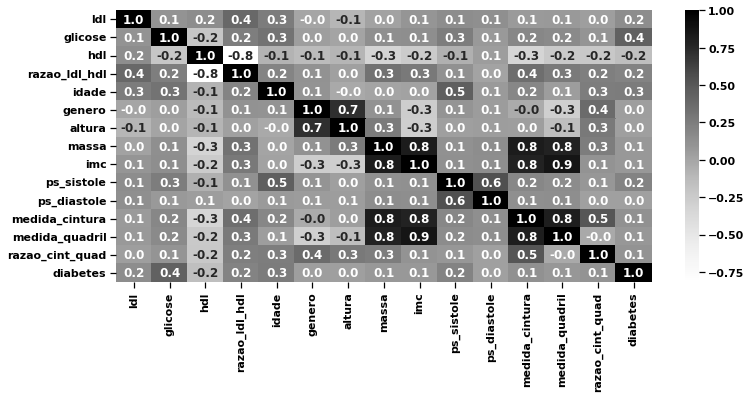

In [35]:
plt.figure(figsize=(12,5));
sns.heatmap(dados_tratados.corr(method='spearman'), annot=True, fmt='.1f', cmap='Greys');

Vamos remover as colunas onde o coefficiente de correlação é zero ou que podem não fazer sentido do ponto de vista prático.

In [36]:
dados_tratados.drop(
    columns=['genero','altura','massa','medida_cintura', 
             'medida_quadril', 'razao_cint_quad'], 
    inplace=True)

dados_tratados.columns

Index(['ldl', 'glicose', 'hdl', 'razao_ldl_hdl', 'idade', 'imc', 'ps_sistole',
       'ps_diastole', 'diabetes'],
      dtype='object')

In [37]:
# Criando as variáves
x = dados_tratados.iloc[:, 0:8]
y = dados_tratados.iloc[:, -1]

> **Normalizando os dados** 

Isso é realizado pois temos várias escalas diferentes entre as variáveis.

In [38]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

> **Balanceando os dados com `Undersampling` e `Oversampling`**

In [39]:
# Configurações/Bibliotecas necessárias:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [40]:
over_sampling = RandomOverSampler(sampling_strategy=0.5)
under_sampling = RandomUnderSampler(sampling_strategy=0.8)

x_over, y_over = over_sampling.fit_resample(x, y)
print(f'Oversampled data: {Counter(y_over)}')

Oversampled data: Counter({0: 311, 1: 155})


In [41]:
x_under, y_under = under_sampling.fit_resample(x, y)
print(f'Undersampled data: {Counter(y_under)}')

Undersampled data: Counter({0: 50, 1: 40})


In [42]:
x_combined_sampling, y_combined_sampling = under_sampling.fit_resample(x_over, y_over)
print(f'Combined sampled data: {Counter(y_combined_sampling)}')

Combined sampled data: Counter({0: 193, 1: 155})


In [43]:
# Novos 'x' e 'y' (balanceados):
x = x_combined_sampling
y = y_combined_sampling

# Separação (treino, teste):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# **4. Modelagem**

Aqui será criado um modelo *baseline* (serve como base) de **Machine Learning**. Como o problem é de **classificação**, modelos classificação serão utilizados. Além disso, como temos rótulos nos dados de treino, temos um **aprendizado supervisionado**.

In [44]:
# configurações/bibliotecas necessárias:
from sklearn.linear_model import LogisticRegression

In [45]:
modelo_reg_log = LogisticRegression()
modelo_reg_log.fit(x_train, y_train)

resultado = modelo_reg_log.score(x_test, y_test)

resultado = round(resultado * 100, 2)
print(f'Acurácia: {resultado}%')

Acurácia: 87.14%


> **Fazendo predições**

In [46]:
# nos dados de teste:
y_predicted = modelo_reg_log.predict(x_test)

# **5. Avaliação do modelo**

Aqui, o modelo criado será avaliado a partir de métricas de performance. Além disso, o impacto da solução proposta também é avaliado.

In [47]:
# Configurações/bibliotecas necessárias:
from sklearn.metrics import confusion_matrix, classification_report

> **Matriz de confusão**

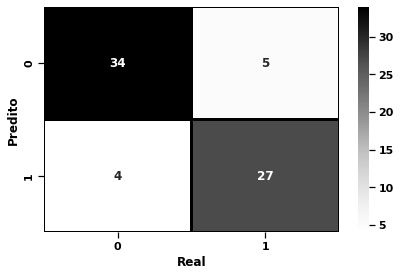

In [48]:
matriz_confusao = confusion_matrix(y_test, y_predicted)
sns.heatmap(matriz_confusao, annot=True, cmap='Greys',
            linecolor='k', lw=1.5);
plt.xlabel('Real');
plt.ylabel('Predito');
plt.tight_layout()
plt.savefig('Confusao_RegLog.png', dpi=600)

In [49]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.84      0.87      0.86        31

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



Dessa forma, as métricas são as seguintes:

*   **Acurácia**: 87%
*   **Precisão**: 87%
*   **Sensibilidade (% taxa de acertos)**: 87%
*   **Score F1 (média harmônica entre sensibilidade e especificidade)**: 87%



> **Calculando a ROC e a AUC (Area Under Curve)**

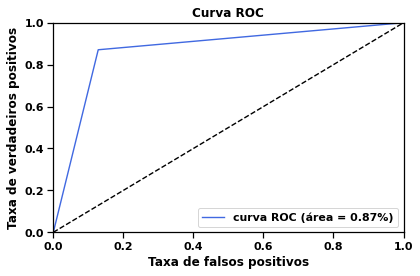

In [50]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
specificity, sensitivity, thresholds = roc_curve(y_test, y_predicted)
roc_auc = auc(specificity, sensitivity)
roc_auc = round(roc_auc, 2)

# Plot ROC curve
plt.plot(specificity, sensitivity, color= 'RoyalBlue', 
         lw=1.4, label=f'curva ROC (área = {roc_auc}%)')
plt.plot([0, 1], [0, 1], '--', lw=1.4, color='k')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de falsos positivos')
plt.ylabel('Taxa de verdadeiros positivos')
plt.title('Curva ROC', weight='bold')
plt.legend(loc="lower right");
plt.tight_layout()
plt.savefig('ROC_AUC.png', dpi=600)

# **6. Deploy**

Nesta etapa, o modelo criado é implementado. Para isso, pode-se utilizar uma *aplicação web* criada com **Streamlit**

In [51]:
# Configurações/bibliotecas necessárias:
import pickle

In [52]:
# salvando o modelo:
pickle.dump(modelo_reg_log, open('regressao_logistica.pkl', 'wb'))

In [53]:
# carregando o modelo e salvando no objeto 'regressao_logistica':
regressao_logistica = pickle.load(open('regressao_logistica.pkl', 'rb'))

> **Abrindo o *deploy*, desenvolvido em um script externo no VS Code**: [WEB-BASED APP](https://share.streamlit.io/oviedovr/predicaodiabetes/main/DeployDiabetes.py).